In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, r"C:\Users\kye09\Documents\Python_Projects\my_da")
from my_da import plot_box_matrix, plot_hist_matrix, plot_correlation_heatmap, plot_box_matrix
from classification import plot_cat_hist, plot_num_kde, plot_num_hist
from timeseries import plot_timeseries
from universal import find_high_collinearity

In [2]:
df = pd.read_csv('rsc/Train.csv')
CLASS_COL = 'Failed'
df.rename(columns={df.columns[-1]: CLASS_COL}, inplace=True)
df[CLASS_COL] = df[CLASS_COL].map({1: 'Failed', 0: 'Success'})
# Reached on time: 1 means failed.

In [3]:
feature_df = df[df.columns.drop(CLASS_COL)]
num_cols = feature_df.columns[feature_df.dtypes != object]
cat_cols = feature_df.columns[feature_df.dtypes == object]
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')
Categorical columns: Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


# Objective
Find insights about this data.

# EDA

## Numeric columns: Correlation with each other

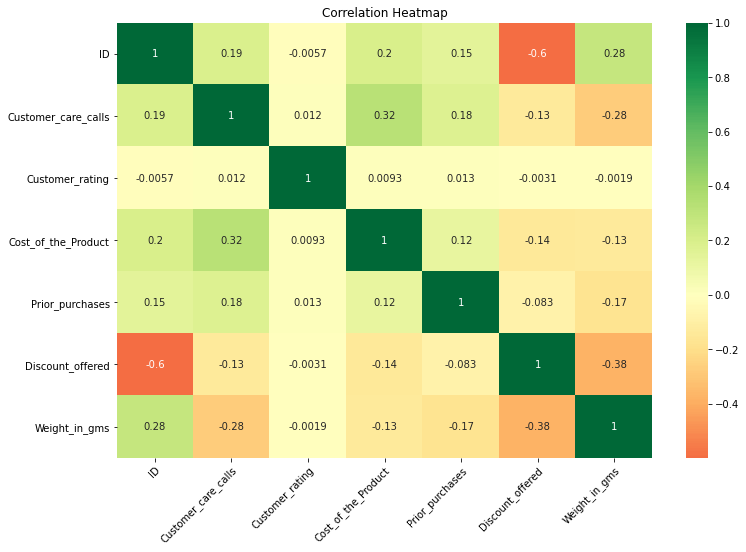

In [4]:
plot_correlation_heatmap(df, num_cols)

In [5]:
find_high_collinearity(df, num_cols, thresh=0.2)

Correlation
first feature       second feature                  
ID                  Discount_offered       -0.598278
                    Weight_in_gms           0.278312
Customer_care_calls Cost_of_the_Product     0.323182
                    Weight_in_gms          -0.276615

### Note 
In general there are very weak correlations.\
"Relatively" strong
1. The amount of discounts decreased with time(ID).
2. The cost of the product shows correlation with the number of customer care calls.
3. There are less discounts on heavier items.
---
Very weak

4. The weight of the products increased with time(ID).
5. The cost of the product increased with time(ID).
6. The cutomer care calls increased with time(ID).

## Numeric columns: Distribution and the correlation with the class

Shape of fig: (3, 3)


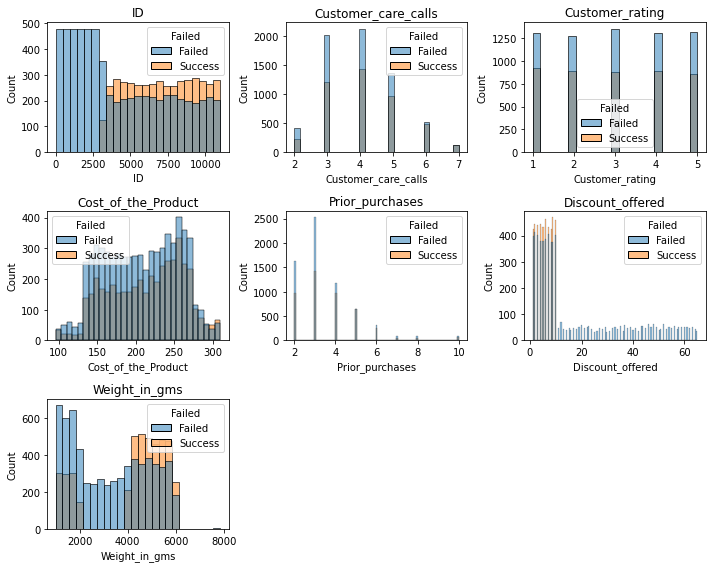

In [6]:
plot_num_hist(df, num_cols, CLASS_COL)

### Note 
1. Company started to ship successfully as time passes.
2. Overall, the failure rate does not correlates to customer care calls. -- may vary with time or cost of item.
3. Higher cost products have better success rate. -- may vary with time.
4. Low discount - High success rate. -- may vary with weight.
5. High weight product - High success rate. -- may vary with value of product.

## Categorical cols: Distribution and the correlation with the class

Shape of fig: (2, 2)


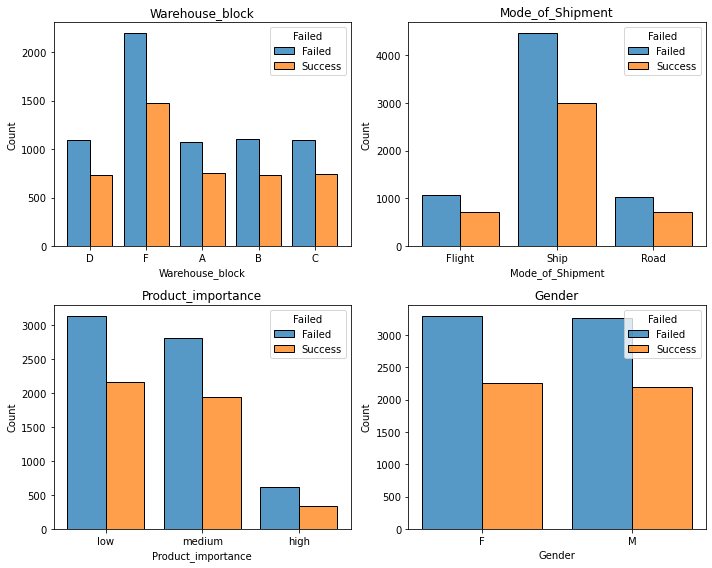

In [7]:
plot_cat_hist(df, cat_cols, CLASS_COL)

### Note
1. Shipping via ship has low success rate.

## Time-series
Since it is obvious that the company changed something after around 2500 orders.\
Let's plot a psudo time-series graph.

### Numeric Timeseries
The following function plots rolling averages every {window} rows.

Shape of fig: (3, 2)


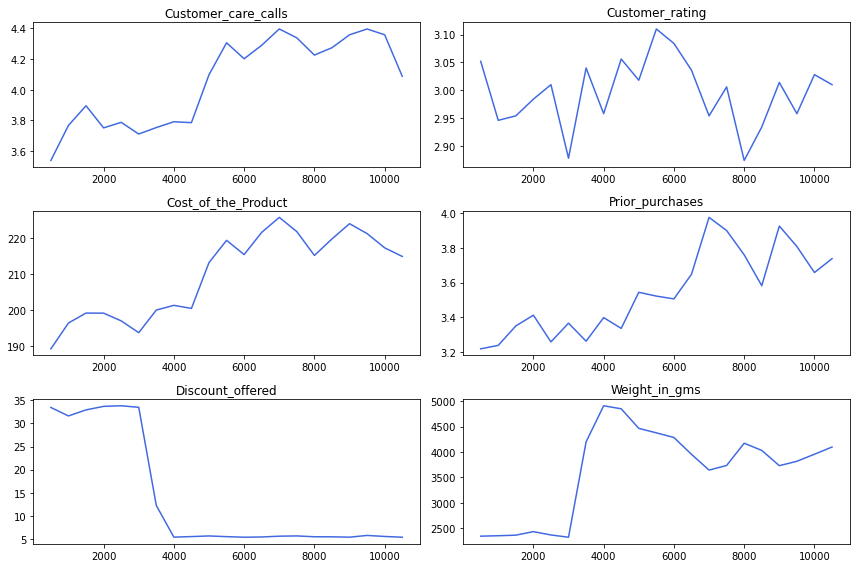

In [8]:
plot_timeseries(df, num_cols.drop('ID'), 'ID', window=500)

### Note:
1. The company is sending more expensive products - Seems to be the reason of more calls.
2. Prior purchases feature is increasing with time. - customers are staying.
3. Company significantly decreased the amount of discount.

<b>Let's prove fisrt point with some quick feature engineering.</b>\
We know that 3 fields have been affected by time(ID): \
1.Cost of the product, 2.Discount offered and 3.Weight in gms.\
Prior purchase is not included because 1. It reacted slowly 2. More importantly this is a cummulative feature so it always goes up.\
Presumably the company fixed their issue.


In [14]:
df['call per cost'] = df['Customer_care_calls'] / df['Cost_of_the_Product']
df['call per weight'] = df['Customer_care_calls'] / df['Weight_in_gms']
df['call per discount'] = df['Customer_care_calls'] / df['Discount_offered']

Shape of fig: (2, 2)


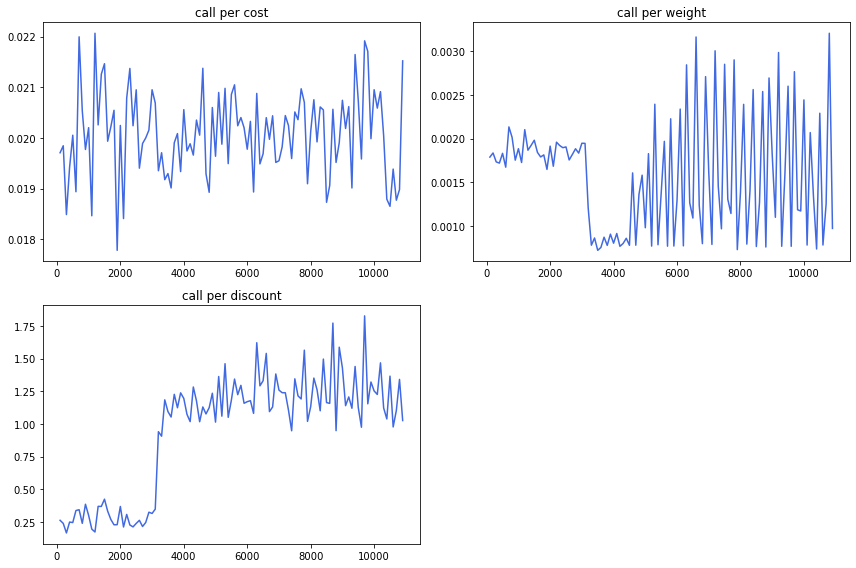

In [15]:
plot_timeseries(df, ['call per cost', 'call per weight', 'call per discount'], 'ID', window= 100)

We can see that call per weight and call per discount faced abrupt change, whereas call per cost remained constant.\
Which shows that the number of calls increased only because of the increased in cost of products.

### Categorical Timeseries
The following function plots rolling sum every {window} rows.

Shape of fig: (3, 2)


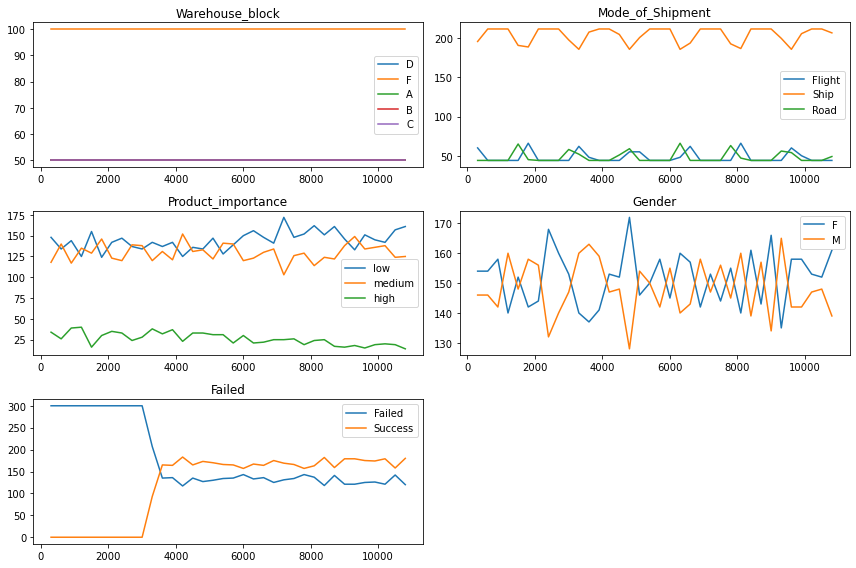

In [9]:
plot_timeseries(df, cat_cols.append(pd.Index([CLASS_COL])), 'ID', window= 300)

### Note
- The warehouse seems to be used in fixed frequency. For example, same warehouses are used every 30 orders. But no change was made over time.
- Mode of shipment is also used in fixed frequency. But no change was made over time..

These don't seem to be the reasons why the failure rate decreased.

## Gathering up the information:
1. After about 2500 orders, the company had increased success rate in timely delivery.
2. The company's shipppment composition of prodcuts has changed, as the average weight and cost of the products has increased. 
3. Company stopped offering high discounts or does not offer discounts on the new products.
4. Customer care calls seems to be increased due to the incrased value in the shipments.